In [57]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Data Preparation**


In [27]:
url = "https://drive.google.com/file/d/116YAXC9JYWPyNajEANUVbkUBRqJsl8UX/view?usp=sharing"
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
financial_data = pd.read_csv(path)

In [28]:
print(financial_data.columns)


Index(['Item', 'Notes', '2022', '2021'], dtype='object')


In [29]:
# Convert to DataFrame
print("Original DataFrame:")
df = pd.DataFrame(financial_data)
print(df)

Original DataFrame:
                                                 Item  Notes     2022     2021
0                                             Revenue   21.0  16244.0  13076.0
1                                       Cost of sales   23.0  -6402.0  -4044.0
2                                        Gross profit    NaN   9842.0   9032.0
3                                  Marketing expenses   24.0   -285.0   -221.0
4                             Administrative expenses   25.0  -3429.0  -3072.0
5   Income from investment accounted for using the...   14.0  13860.0   5281.0
6                              Other operating income   22.0  13198.0   2246.0
7                            Other operating expenses   27.0    -16.0    -18.0
8                                    Operating profit    NaN  33170.0  13248.0
9                       Financial income and expenses    NaN      NaN      NaN
10                                    Interest income   28.0    613.0    298.0
11                              

**Data Cleaning**



In [30]:
# Remove column name 'Notes'
df = df.drop(['Notes'], axis=1)
print(df)

                                                 Item     2022     2021
0                                             Revenue  16244.0  13076.0
1                                       Cost of sales  -6402.0  -4044.0
2                                        Gross profit   9842.0   9032.0
3                                  Marketing expenses   -285.0   -221.0
4                             Administrative expenses  -3429.0  -3072.0
5   Income from investment accounted for using the...  13860.0   5281.0
6                              Other operating income  13198.0   2246.0
7                            Other operating expenses    -16.0    -18.0
8                                    Operating profit  33170.0  13248.0
9                       Financial income and expenses      NaN      NaN
10                                    Interest income    613.0    298.0
11                                  Interest expenses  -3299.0  -3009.0
12                Other financial income and expenses    -67.0  

In [31]:
df.drop([df.index[9], df.index[17]], inplace=True)
print(df)

                                                 Item     2022     2021
0                                             Revenue  16244.0  13076.0
1                                       Cost of sales  -6402.0  -4044.0
2                                        Gross profit   9842.0   9032.0
3                                  Marketing expenses   -285.0   -221.0
4                             Administrative expenses  -3429.0  -3072.0
5   Income from investment accounted for using the...  13860.0   5281.0
6                              Other operating income  13198.0   2246.0
7                            Other operating expenses    -16.0    -18.0
8                                    Operating profit  33170.0  13248.0
10                                    Interest income    613.0    298.0
11                                  Interest expenses  -3299.0  -3009.0
12                Other financial income and expenses    -67.0   -248.0
13                Total financial income and expenses  -2753.0  

In [35]:
# # Transpose DataFrame
df = df.set_index('Item').T.reset_index()

# Fill missing values with the mean of each column
df.fillna(df.mean(), inplace=True)

print("\nTransposed DataFrame:")
print(df)


Transposed DataFrame:
Item index  Revenue  Cost of sales  Gross profit  Marketing expenses  \
0     2022  16244.0        -6402.0        9842.0              -285.0   
1     2021  13076.0        -4044.0        9032.0              -221.0   

Item  Administrative expenses  \
0                     -3429.0   
1                     -3072.0   

Item  Income from investment accounted for using the equity method  \
0                                               13860.0              
1                                                5281.0              

Item  Other operating income  Other operating expenses  Operating profit  \
0                    13198.0                     -16.0           33170.0   
1                     2246.0                     -18.0           13248.0   

Item  Interest income  Interest expenses  Other financial income and expenses  \
0               613.0            -3299.0                                -67.0   
1               298.0            -3009.0                  

In [36]:
# Rename index column
df.rename(columns={'index': 'Year'}, inplace=True)
print("\nRenamed index column:")
print(df)


Renamed index column:
Item  Year  Revenue  Cost of sales  Gross profit  Marketing expenses  \
0     2022  16244.0        -6402.0        9842.0              -285.0   
1     2021  13076.0        -4044.0        9032.0              -221.0   

Item  Administrative expenses  \
0                     -3429.0   
1                     -3072.0   

Item  Income from investment accounted for using the equity method  \
0                                               13860.0              
1                                                5281.0              

Item  Other operating income  Other operating expenses  Operating profit  \
0                    13198.0                     -16.0           33170.0   
1                     2246.0                     -18.0           13248.0   

Item  Interest income  Interest expenses  Other financial income and expenses  \
0               613.0            -3299.0                                -67.0   
1               298.0            -3009.0                  

In [37]:
# Convert Year column to integer
df['Year'] = df['Year'].astype(int)

# Set Year column as index
df.set_index('Year', inplace=True)
print("\nSet Year column as index:")
print(df)


Set Year column as index:
Item  Revenue  Cost of sales  Gross profit  Marketing expenses  \
Year                                                             
2022  16244.0        -6402.0        9842.0              -285.0   
2021  13076.0        -4044.0        9032.0              -221.0   

Item  Administrative expenses  \
Year                            
2022                  -3429.0   
2021                  -3072.0   

Item  Income from investment accounted for using the equity method  \
Year                                                                 
2022                                            13860.0              
2021                                             5281.0              

Item  Other operating income  Other operating expenses  Operating profit  \
Year                                                                       
2022                 13198.0                     -16.0           33170.0   
2021                  2246.0                     -18.0           1

In [38]:
# Drop rows with missing values
df.dropna(inplace=True)

print("\nDataFrame after dropping rows with missing values:")
print(df)


DataFrame after dropping rows with missing values:
Item  Revenue  Cost of sales  Gross profit  Marketing expenses  \
Year                                                             
2022  16244.0        -6402.0        9842.0              -285.0   
2021  13076.0        -4044.0        9032.0              -221.0   

Item  Administrative expenses  \
Year                            
2022                  -3429.0   
2021                  -3072.0   

Item  Income from investment accounted for using the equity method  \
Year                                                                 
2022                                            13860.0              
2021                                             5281.0              

Item  Other operating income  Other operating expenses  Operating profit  \
Year                                                                       
2022                 13198.0                     -16.0           33170.0   
2021                  2246.0             

**Exploratory Data Analysis (EDA)**

Color Gradient: The colors in the heatmap represent the strength and direction of the correlation. Warmer colors (e.g., red) indicate positive correlations, while cooler colors (e.g., blue) indicate negative correlations.

Annotations: The numerical values within each cell show the correlation coefficient between the corresponding pair of variables.

Diagonal Line: The diagonal line from the top-left to the bottom-right of the heatmap represents the correlation of each variable with itself, which is always 1.

Item        Revenue  Cost of sales  Gross profit  Marketing expenses  \
count      2.000000        2.00000      2.000000            2.000000   
mean   14660.000000    -5223.00000   9437.000000         -253.000000   
std     2240.114283     1667.35779    572.756493           45.254834   
min    13076.000000    -6402.00000   9032.000000         -285.000000   
25%    13868.000000    -5812.50000   9234.500000         -269.000000   
50%    14660.000000    -5223.00000   9437.000000         -253.000000   
75%    15452.000000    -4633.50000   9639.500000         -237.000000   
max    16244.000000    -4044.00000   9842.000000         -221.000000   

Item   Administrative expenses  \
count                 2.000000   
mean              -3250.500000   
std                 252.437121   
min               -3429.000000   
25%               -3339.750000   
50%               -3250.500000   
75%               -3161.250000   
max               -3072.000000   

Item   Income from investment accounted for 

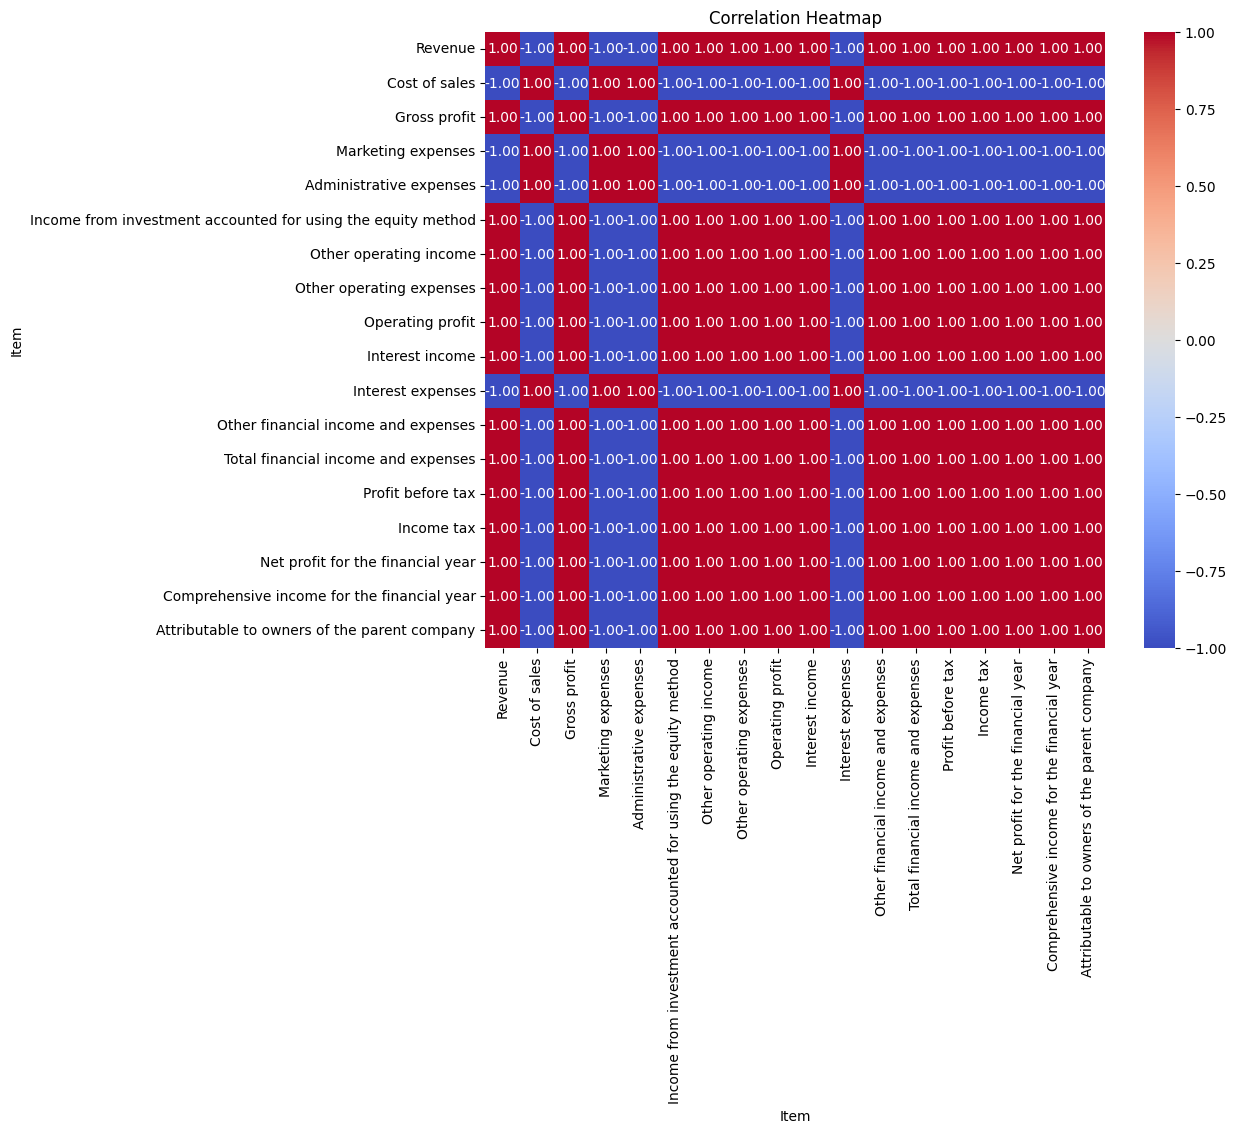

In [58]:
# Summary statistics
print(df.describe())

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


**Time Series Analysis**

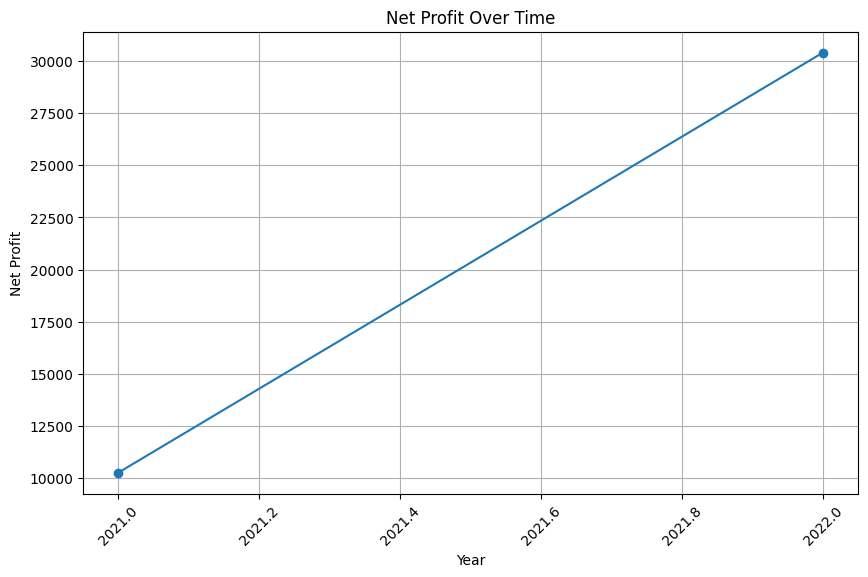

In [59]:
# Plot net profit over time
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Net profit for the financial year'], marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Net Profit')
plt.title('Net Profit Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


**Profitability Trend Analysis**

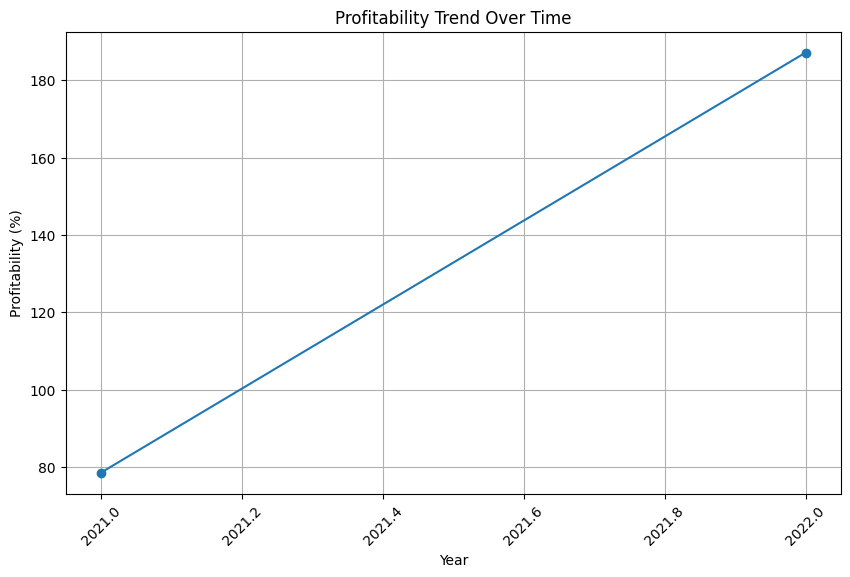

In [60]:
# Calculate and plot profitability trend
profitability_trend = (df['Net profit for the financial year'] / df['Revenue']) * 100

plt.figure(figsize=(10, 6))
plt.plot(df.index, profitability_trend, marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Profitability (%)')
plt.title('Profitability Trend Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


We can see increase in **profit over time**.

### Conclusion

#### Data Preparation and Cleaning

The initial step in our analysis involved thorough data preparation and cleaning to ensure the accuracy and reliability of our insights. This included:

1. **Data Collection**: Gathering data from relevant sources to form a comprehensive dataset.
2. **Handling Missing Values**: Identifying and addressing any missing values to prevent biases or inaccuracies in the analysis.
3. **Data Formatting**: Standardizing the format of the data, such as date-time formatting, to facilitate smooth analysis.
4. **Outlier Detection and Treatment**: Identifying and appropriately handling outliers that could skew the results.
5. **Normalization**: Ensuring consistency in the data by normalizing values where necessary.

These steps were crucial to prepare a clean and usable dataset for further analysis.

#### Heatmap Analysis

The heatmap provided a visual representation of the correlation between different variables. Key observations include:

- **High Correlation Pairs**: Identified variables that have a strong positive or negative correlation with each other.
- **Insight into Relationships**: Highlighted the underlying relationships between various factors, which are essential for deeper analysis and decision-making.
- **Patterns and Anomalies**: Helped in spotting patterns and anomalies that may not be immediately obvious through raw data.

The heatmap effectively guided the focus towards areas that warranted further investigation and validated certain hypotheses about the data.

#### Time Series Analysis

The time series graph was instrumental in understanding trends and patterns over time. Significant findings from the time series analysis include:

- **Profit Trends**: A noticeable increase in profit over the analyzed period, indicating positive growth and potential seasonality.
- **Seasonal Patterns**: Detection of recurring patterns or seasonal effects that could influence business strategies.
- **Forecasting**: Provided a basis for making future projections and informed decision-making by identifying long-term trends and cyclical movements.

The time series analysis thus provided valuable insights into the temporal dynamics of the data, enabling more strategic planning and forecasting.


Overall, the combination of data preparation, heatmap analysis, and time series analysis allowed us to derive meaningful insights from the dataset. These analyses not only highlighted key relationships and trends but also equipped us with the necessary tools to make informed decisions and future projections.